## Metocean assessment task
### Ex 05 

In [208]:
def plotGlobeBR(lon= -40.221446,lat=-20.259698,ax=None):
    
    '''
    Plot Globe centered on a given coordinate (lon,lat)
    
    Input: 
    -lon=central longitude in decimal degrees
    -lat=central latitude in decimal degrees
    
    Output:
    -Globe

    '''

    from mpl_toolkits.basemap import Basemap
    from matplotlib.patches import Polygon
    from matplotlib.collections import PatchCollection
    from matplotlib.patches import PathPatch
    import matplotlib.pyplot as plt
    import numpy as np

    
    if ax:
        ax=ax
    else:
        fig, ax = plt.subplots()
        
    m = Basemap(projection='ortho',lat_0=lat,lon_0=lon,resolution='l',ax=ax)
    m.drawcoastlines(linewidth=0.25)
    m.drawcountries(linewidth=0.25)
    m.etopo()
    m.fillcontinents(color='gray',lake_color='aqua')
    m.readshapefile(r'c:\Users\saulo.meirelles\Documents\gadm36_BRA_shp\gadm36_BRA_1', 'comarques')
    patches   = []
    for info, shape in zip(m.comarques_info, m.comarques):
        if info['NAME_0'] == 'Brazil':
            patches.append( Polygon(np.array(shape), True) )

    ax.add_collection(PatchCollection(patches, facecolor= 'r', edgecolor='k', linewidths=1., zorder=2))
    m.plot(lon,lat,'*',color='lightgreen', markeredgecolor='k', ms=18,latlon=True)
    
    
def makeMap(lon= -40.221446,lat=-20.259698,dlat=.01,dlon=.01,epsg=5641,plotDomain=None,uf='Espírito Santo',fs=14,ax=None):
    
    '''
    Plot map for a certain region
    
    Input: 
    -lon=central longitude in decimal degrees
    -lat=central latitude in decimal degrees
    -dlon=distance from central longitude (in degrees)
    -dlat=distance from central latitude (in degrees)
    -epsg=EPSG code for the region (see https://epsg.io/)
    -plotDomain=(lon,lat)
    -uf=Units of the Federation or States
    -fs=fonte size
    
    Output:
    -Map of the region

    '''
    
    from mpl_toolkits.basemap import Basemap
    import matplotlib.pyplot as plt
    from matplotlib.collections import PatchCollection
    from matplotlib.patches import PathPatch
    from matplotlib.patches import Polygon
    import numpy as np
 
    if ax:
        ax=ax
    else:
        fig, ax = plt.subplots()
    
    m = Basemap(llcrnrlon=lon-dlon/4,
                llcrnrlat=lat-dlat,
                urcrnrlon=lon+dlon,
                urcrnrlat=lat+dlat,
                rsphere=(6378137.00,6356752.3142),
                resolution='f',projection='merc',
                epsg=epsg,
                lat_0=lat,lon_0=lon,
                ax=ax)
    
    m.plot(lon,lat,'o',color='lightgreen',markeredgecolor='k',ms=10,latlon=True)
    
    m.drawparallels(np.linspace(lat-dlat,lat+dlat,5).round(2), labels=[0,1,0,0], fontsize=fs)
    m.drawmeridians(np.linspace(lon-dlon,lon+dlon,5).round(2), labels=[0,0,0,1], fontsize=fs)
    m.drawmapscale(lon,lat+lat*0.0045,lon,lat,10, barstyle='fancy',fontsize=fs,fontcolor='k',units='km')

    m.readshapefile(r'c:\Users\saulo.meirelles\Documents\gadm36_BRA_shp\gadm36_BRA_1', 'comarques')

    patches = []
    for info, shape in zip(m.comarques_info, m.comarques):
        if info['NAME_1'] == uf:
            patches.append( Polygon(np.array(shape), True) )
    
    ax.add_collection(PatchCollection(patches, facecolor= 'r', edgecolor='k', linewidths=1., zorder=2))
    
    if plotDomain:
        lon, lat = plotDomain
        m.plot(lon,lat,'-b',lw=.7,latlon=True)
    



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


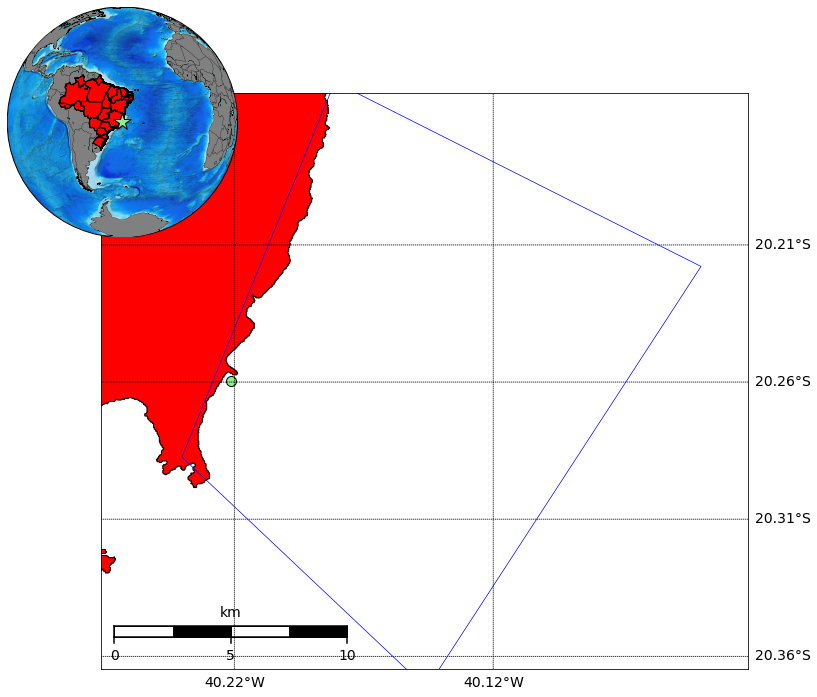

In [214]:
import matplotlib.pyplot as plt

SWANdom = np.array([[-40.24025963932396,-20.28736305443049],
                    [-40.14573408620902,-20.37161510239828],
                    [-40.03973718708344,-20.21783923654367],
                    [-40.18122435445007,-20.15055150694549],
                    [-40.24025963932396,-20.28736305443049]]) # extracted from Google Earth (kml)

fig = plt.figure(figsize=(15,8))
ax0 = fig.add_axes([0,0,1,1])
ax1 = fig.add_axes([0.02,.75,.4,.4])

plotGlobeBR(ax=ax1)
makeMap(ax=ax0,dlat=.105,dlon=.2,plotDomain=(SWANdom[:,0],SWANdom[:,1]))

fig.savefig('studyArea.png',bbox_inches='tight')
